In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import os
if not os.path.isdir("datasets"):
  !unzip -q /content/drive/My\ Drive/datasets.zip
else:
  print("datasets is already unzipped")
  %ls datasets

datasets is already unzipped
mnist/


In [36]:
%ls /content/drive/My\ Drive/Colab\ Notebooks/vgg.py
%cd /content
%pwd

'/content/drive/My Drive/Colab Notebooks/vgg.py'


'/content'

In [38]:
import numpy as np
import scipy.ndimage as ndi

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

import sys
sys.path.append('drive/My Drive/Colab Notebooks')

from vgg import vgg16

In [39]:
batch_size = 64
shuffle_buffer_size = 60000

In [40]:
%ls datasets

mnist/


Found 41660 files belonging to 10 classes.
Using 33328 files for training.
Found 41660 files belonging to 10 classes.
Using 8332 files for validation.
Found 340 files belonging to 10 classes.


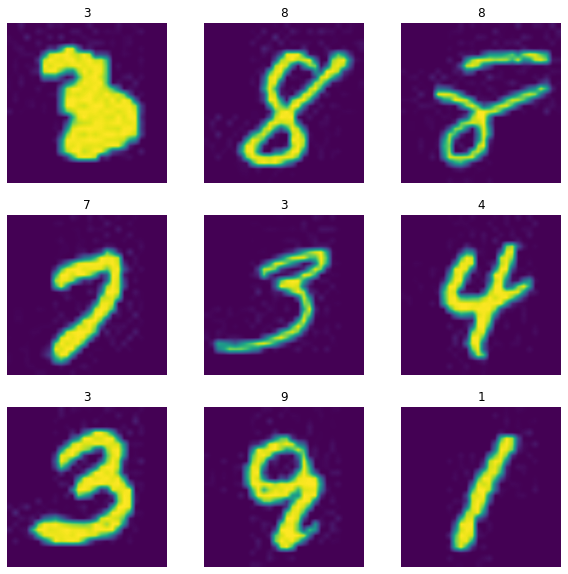

In [41]:
train_dataset = keras.preprocessing.image_dataset_from_directory(
    "datasets/mnist/trainingData",
    validation_split=0.2,
    subset="training",
    seed=1137,
    batch_size=batch_size,
    image_size=(224,224),
    color_mode="grayscale"
)

validation_dataset = keras.preprocessing.image_dataset_from_directory(
    "datasets/mnist/trainingData",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    batch_size=batch_size,
    image_size=(224,224),
    color_mode="grayscale"
)

test_dataset = keras.preprocessing.image_dataset_from_directory(
    "datasets/mnist/testData",
    batch_size=batch_size,
    image_size=(224,224),
    color_mode="grayscale"
)

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

In [42]:
vgg16_model = vgg16(num_classes = 10)

vgg16_model.summary()

keras.utils.plot_model(vgg16_model, show_shapes=True)

vgg16_model.compile(optimizer="adam",
                    loss=keras.losses.SparseCategoricalCrossentropy(),
                    metrics="sparse_categorical_accuracy",
                    run_eagerly=False)

checkpoint_dir = "train_ckpt/cp-{epoch:04d}.ckpt"
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir, save_weights_only=True, verbose=1)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 224, 224, 64)      640       
_________________________________________________________________
conv_2 (Conv2D)              (None, 224, 224, 64)      36928     
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 112, 112, 64)      0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 112, 112, 128)     73856     
_________________________________________________________________
conv_4 (Conv2D)              (None, 112, 112, 128)     147584    
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 56, 56, 128)      

In [ ]:
history = vgg16_model.fit(train_dataset, validation_data=validation_dataset, epochs=20, callbacks=[cp_callback])

Epoch 1/20
521/521 [==============================] - ETA: 0s - loss: 0.2092 - sparse_categorical_accuracy: 0.9362
Epoch 00001: saving model to train_ckpt/cp-0001.ckpt
521/521 [==============================] - 474s 910ms/step - loss: 0.2092 - sparse_categorical_accuracy: 0.9362 - val_loss: 0.1083 - val_sparse_categorical_accuracy: 0.9683
Epoch 2/20
521/521 [==============================] - ETA: 0s - loss: 0.0665 - sparse_categorical_accuracy: 0.9800
Epoch 00002: saving model to train_ckpt/cp-0002.ckpt
521/521 [==============================] - 486s 934ms/step - loss: 0.0665 - sparse_categorical_accuracy: 0.9800 - val_loss: 0.1637 - val_sparse_categorical_accuracy: 0.9501
Epoch 3/20
521/521 [==============================] - ETA: 0s - loss: 0.0843 - sparse_categorical_accuracy: 0.9772
Epoch 00003: saving model to train_ckpt/cp-0003.ckpt
521/521 [==============================] - 501s 961ms/step - loss: 0.0843 - sparse_categorical_accuracy: 0.9772 - val_loss: 0.0424 - val_sparse_catego

In [ ]:
results = vgg16_model.evaluate(test_dataset)